pd와 re임포트하고 필요한 nltk모듈을 임포트합니다.

In [48]:
import pandas as pd  # Use the pandas library with the name pd
import re  # import the re module to use regular expressions

# NLTK 라이브러리 설치
%pip install nltk

# NLTK 모듈 import
import nltk
from nltk.corpus import stopwords  # nltk stopword module
from nltk.tokenize import word_tokenize  # Use word_tokenize function to tokenize word by word
from nltk.stem import PorterStemmer, WordNetLemmatizer  # For stemming and lemmatization
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # Use VADER sentiment analyzer
from sklearn.model_selection import train_test_split, GridSearchCV  # Import for training/test data split and grid search
from sklearn.svm import SVR  # import SVR model
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix  # Import metrics for model evaluation
import matplotlib.pyplot as plt  # Use the matplotlib library with the name plt
import seaborn as sns  # Use the seaborn library with the name sns

Note: you may need to restart the kernel to use updated packages.


1.데이터 전처리
데이터 로드후 파일 내용과 컬럼이름을 확인해줍니다.

In [49]:
# 데이터 로드 및 기본 전처리
df = pd.read_csv('./wine_review.csv')  # './wine_review.csv' 파일을 읽어와 DataFrame인 df에 저장하기
df.head()  # df의 처음 5개 행 출력해서 csv 파일 내용확인
print(df.columns)  # 컬럼 이름 확인



Index(['id', 'asins', 'brand', 'categories', 'dateAdded', 'dateUpdated',
       'descriptions', 'dimension', 'ean', 'flavors', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend',
       'reviews.id', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'sourceURLs', 'upc', 'weight'],
      dtype='object')


컬럼중에서 reviews.rating,reviews.text,reviews.title,name,brand를 분석대상으로 정합니다. 다음으론 텍스트를 전처리 해줍니다.
데이터를 최대한 살리기 위해 결측값은 제거가 아닌 빈문자열로 채워줍니다.

In [50]:
 #텍스트 전처리 함수
def preprocess_text(text):
    text = text.fillna('')  # 결측값을 빈 문자열로 채움
    text = text.astype(str)  # 문자열로 변환
    text = text.apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))  # 특수 문자 제거
    text = text.apply(lambda x: re.sub(r'\d+', '', x))  # 숫자 제거
    text = text.apply(lambda x: re.sub(r'\s+', ' ', x).strip())  # 불필요한 공백 제거
    text = text.apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))  # 불용어 제거
    text = text.apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))  # 스테밍 적용
    text = text.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))  # 표제어 추출 적용
    return text

필요한 nltk를 다운합니다.

In [51]:
# NLTK 다운로드
nltk.download('stopwords')  # nltk 불용어 리스트 다운로드
nltk.download('punkt')  # nltk 토큰화 도구 다운로드
nltk.download('wordnet')  # nltk 표제어 추출 도구 다운로드
nltk.download('vader_lexicon')  # VADER 감정 분석을 위한 lexicon 다운로드


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [52]:
# 불용어 및 스테머, 표제어 추출기 초기화
stop_words = set(stopwords.words('english'))  # 'english' 언어에 해당하는 NLTK 불용어 리스트를 가져와서 set 형태로 stop_words 변수에 저장
stemmer = PorterStemmer()  # 스테머 초기화
lemmatizer = WordNetLemmatizer()  # 표제어 추출기 초기화

사용할 텍스트 컬럼인 reviews.text, reviews.title, name, brand를 텍스트 전처리를 위해 하나로 합처줍니다.

In [53]:
# 사용할 텍스트 컬럼을 하나로 합치기
df['combined_text'] = df['reviews.text'].fillna('') + ' ' + df['reviews.title'].fillna('') + ' ' + df['name'].fillna('') + ' ' + df['brand'].fillna('')

# 텍스트 전처리
df['combined_text'] = preprocess_text(df['combined_text'])


In [54]:
df.drop([
"id", "asins", "categories", "dateAdded", "dateUpdated", "descriptions", "dimension", "ean", "flavors", "keys", "manufacturer", "manufacturerNumber", "reviews.date", "reviews.dateAdded", "reviews.dateSeen", "reviews.didPurchase", "reviews.doRecommend", "reviews.id", "reviews.numHelpful", "reviews.sourceURLs", "reviews.userCity", "reviews.userProvince", "reviews.username", "sizes", "sourceURLs", "upc", "weight"], axis = 1, inplace=True)

In [55]:
# CSV 파일로 저장
df.to_csv('cleaned_review.csv', index=False)

In [56]:
# 데이터 로드
df = pd.read_csv('cleaned_review.csv')
df.head()  # df의 처음 5개 행 출력해서 csv 파일 내용확인
print(df.columns)  # 컬럼 이름 확인

Index(['brand', 'name', 'reviews.rating', 'reviews.text', 'reviews.title',
       'combined_text'],
      dtype='object')


감정점수 계산을 진행합니다.

In [61]:
# 감정 점수 계산
vader_sentiment = SentimentIntensityAnalyzer()  # VADER 감정 분석기 초기화
df['sentiment_score'] = df['combined_text'].apply(lambda x: vader_sentiment.polarity_scores(x)["compound"])
print(df.sentiment_score)

0       0.0000
1       0.5574
2       0.5994
3       0.3818
4       0.6694
         ...  
2885    0.8961
2886    0.9545
2887    0.9118
2888    0.9022
2889    0.0000
Name: sentiment_score, Length: 2890, dtype: float64


처음 roc curve 시각화를 진행하였을때 auc스코어가 0.3으로 너무 낮게 나와 분류성능이 제대로 나오지 못했다고 판단했습니다.
따라서 피처 엔지니어링(특정단어들을 분석시키는것)을 통해 리뷰텍스트길이, 키워드빈도 피처를 만들어서 분류정밀도를 높여줍니다.
단어선정은 직접 데이터 파일을 확인하고 자주 나오는 단어를 적당히 골라서 5개 넣어줬습니다.(5개가 넘어가면 모델학습에서 시간이 너무 오래걸려서 5개만 선정했습니다.)

In [31]:
# 피처 엔지니어링: 리뷰 텍스트 길이 추가
df['text_length'] = df['combined_text'].apply(len)

# 특정 키워드 빈도 피처 추가
keywords = ['excellent', 'love', 'great', 'no', 'bad']
for keyword in keywords:
    df[f'keyword_{keyword}'] = df['combined_text'].apply(lambda x: x.lower().split().count(keyword))
print(df[f'keyword_{'excellent'}'])
print(df[f'keyword_{'love'}'])
print(df[f'keyword_{'great'}'])
print(df[f'keyword_{'no'}'])
print(df[f'keyword_{'bad'}'])

0       0
1       0
2       0
3       0
4       0
       ..
2885    0
2886    0
2887    0
2888    0
2889    0
Name: keyword_excellent, Length: 2380, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
2885    1
2886    0
2887    0
2888    0
2889    0
Name: keyword_love, Length: 2380, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
2885    0
2886    0
2887    0
2888    0
2889    0
Name: keyword_great, Length: 2380, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
2885    0
2886    0
2887    0
2888    0
2889    0
Name: keyword_no, Length: 2380, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
2885    0
2886    0
2887    0
2888    0
2889    0
Name: keyword_bad, Length: 2380, dtype: int64


다음은 라벨링입니다. 감정점수에따라 0이상이면 긍정, 미만이면 부정으로 합니다.
또한 정확도를 높이기위해 review.rating(리뷰평점)또한 라벨링에 포함시킵니다.
1~2점을 부정(0),3~5점을 긍정(1)으로 해줍니다.

In [32]:
# 감정 점수에 따라 라벨링
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 1 if x >= 0 else 0)  # 감정 점수가 0 이상이면 긍정(1), 그렇지 않으면 부정(0)으로 라벨링

# reviews.rating을 기반으로 라벨링
def rating_to_label(rating):
    if rating in [1, 2]:
        return 0  # 부정
    elif rating in [3, 4, 5]:
        return 1  # 긍정
    else:
        return None

df['rating_label'] = df['reviews.rating'].apply(rating_to_label)

라벨링된 점수의 결측값을 제거해줍니다.
감정점수 리뷰점수가 일치하는지 확인해줍니다.
라벨을 분리해줍니다.

In [33]:
# 결측값 제거
df = df.dropna(subset=['rating_label'])

# 감정 점수와 리뷰 점수가 일치하는지 확인
df['matched_label'] = df.apply(lambda row: 1 if row['sentiment_label'] == row['rating_label'] else 0, axis=1)

# 라벨을 분리
features = ['sentiment_score', 'text_length'] + [f'keyword_{keyword}' for keyword in keywords]
X = df[features]  # 피처로 사용
y = df['rating_label']  # 리뷰 점수를 기반으로 한 라벨을 타겟 변수로 사용

In [21]:
print(df.matched_label)#매치가 잘 이루어지고 있다면 1
print(df.rating_label)

0       1
1       1
2       1
3       1
4       1
       ..
2885    1
2886    1
2887    1
2888    1
2889    1
Name: matched_label, Length: 2445, dtype: int64
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2885    1.0
2886    1.0
2887    1.0
2888    1.0
2889    1.0
Name: rating_label, Length: 2445, dtype: float64


In [ ]:
2.모델 구현, 모델학습 및 튜닝
VR모델을 적용합니다.

In [10]:
# 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 데이터를 학습 세트와 테스트 세트로 8:2 비율로 분할하고, random_state를 42로 설정하여 일관된 결과를 얻도록 함

# 그리드 서치를 통한 SVR 모델 하이퍼파라미터 튜닝
param_grid = {'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1]}  # 하이퍼파라미터 그리드 설정
svr = SVR(kernel='linear')  # 선형 커널을 사용하는 SVR 모델 초기화
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')  # 그리드 서치 객체 생성, 교차 검증은 5회, 성능 평가는 음의 평균 제곱 오차로 설정
grid_search.fit(X_train, y_train)  # 그리드 서치를 통해 모델 학습 및 최적 하이퍼파라미터 찾기

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1]},
             scoring='neg_mean_squared_error')

In [11]:
# 최적 모델로 예측 수행
best_svr = grid_search.best_estimator_  # 최적의 SVR 모델 선택
y_pred = best_svr.predict(X_test)  # 테스트 세트에 대한 예측 수행

In [12]:
# 이진 분류를 위한 임계값 설정
threshold = 0.5  # 임계값 설정
y_pred_label = (y_pred >= threshold).astype(int)  # 예측값이 임계값 이상이면 1, 그렇지 않으면 0으로 이진 분류

4.모델평가

In [13]:
# 모델 평가
accuracy = accuracy_score(y_test, y_pred_label)  # 정확도 계산
precision = precision_score(y_test, y_pred_label)  # 정밀도 계산
recall = recall_score(y_test, y_pred_label)  # 재현율 계산
f1 = f1_score(y_test, y_pred_label)  # F1 점수 계산
roc_auc = roc_auc_score(y_test, y_pred)  # ROC-AUC 점수 계산

print(f'Best Parameters: {grid_search.best_params_}')  # 최적의 하이퍼파라미터 출력
print(f'Root Mean Squared Error: {mean_squared_error(y_test, y_pred, squared=False)}')  # RMSE 출력
print(f'Accuracy: {accuracy}')  # 정확도 출력
print(f'Precision: {precision}')  # 정밀도 출력
print(f'Recall: {recall}')  # 재현율 출력
print(f'F1 Score: {f1}')  # F1 점수 출력
print(f'ROC AUC Score: {roc_auc}')  # ROC-AUC 점수 출력

Best Parameters: {'C': 1, 'epsilon': 0.1}
Root Mean Squared Error: 0.22805284713253068
Accuracy: 0.9447852760736196
Precision: 0.9447852760736196
Recall: 1.0
F1 Score: 0.9716088328075709
ROC AUC Score: 0.5978835978835979


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


정확도 정밀도 재현율 f1점수들은 처음 진행했던것(피처엔지니어링 사용전)과 비슷한 수치를 보이고
roc auc score가 0.6정도의 수치를 보여줍니다.

6.시각화 및 보고

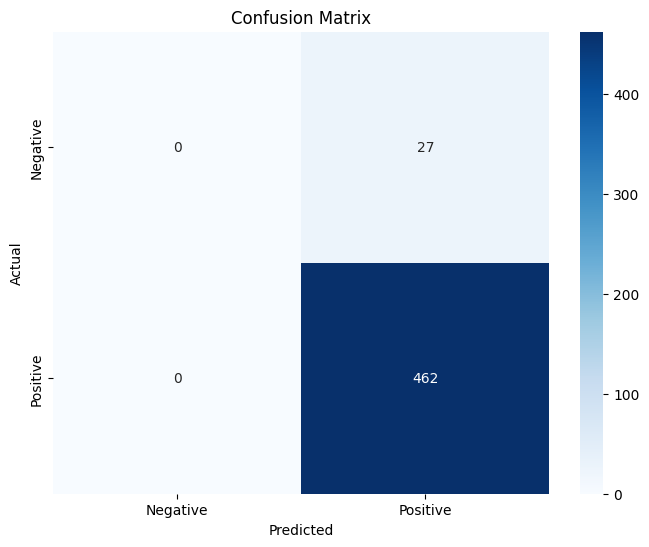

In [14]:
# 혼동 행렬 생성 및 시각화
conf_matrix = confusion_matrix(y_test, y_pred_label)  # 혼동 행렬 생성
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])  # 혼동 행렬 시각화
plt.xlabel('Predicted')  # x축 라벨 설정
plt.ylabel('Actual')  # y축 라벨 설정
plt.title('Confusion Matrix')  # 그래프 제목 설정
plt.show()  # 그래프 출력

예측에서는 부정예측이 0으로 나오고 positive예측만 몰린것으로 보입니다.

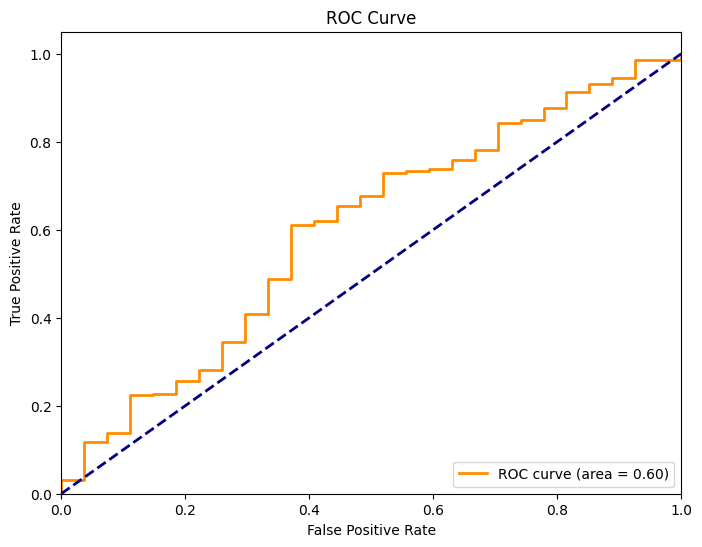

In [42]:
# ROC 커브 그리기
fpr, tpr, _ = roc_curve(y_test, y_pred)  # FPR, TPR 계산
roc_auc = auc(fpr, tpr)  # AUC 계산

plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)  # ROC 커브 그리기
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 대각선 기준선 그리기
plt.xlim([0.0, 1.0])  # x축 범위 설정
plt.ylim([0.0, 1.05])  # y축 범위 설정
plt.xlabel('False Positive Rate')  # x축 라벨 설정
plt.ylabel('True Positive Rate')  # y축 라벨 설정
plt.title('ROC Curve')  # 그래프 제목 설정
plt.legend(loc='lower right')  # 범례 위치 설정
plt.show()  # 그래프 출력

#Roc 커브 분석

처음 나왔던 예측 정확도인 0.3보다는 두배 더 높은 수치가 나와주었습니다.
하지만 객관적으로 보았을때 0.6이라는 수치는 여전히 예측이 어려운 상황으로 보입니다.
예측성능을 높이기 위해 분류대상을 늘리기, 피처 키워드의 수를 늘리거나 혹은 다른 모델을 적용하는것을 고려해볼 수도 있을것으로 보입니다.

#오버피팅 언더피팅 논의

앞서 나온 혼동행렬에서 긍정예측으로 몰린것은 이진라벨로 분류해서 생기는 현상으로도 보일수도 있지만
실제 데이터에서 대부분의 reviews.rating(리뷰점수)와 review.text(리뷰내용)이 4~5점이며 거의 긍정적인 내용만이 있는것을 볼 수 있습니다.
이러한 이유로 긍정예측이 압도적으로 몰리면서 언더피팅이 생긴것으로 보입니다.
따라서 최대한 부정을 잘 찾아내도록 피처내용과 리뷰점수의 긍정 부정범위를 바꿔보겠습니다.


In [66]:
# 텍스트 전처리
df['reviews.text'] = preprocess_text(df['reviews.text'])#reviews.text의 키워드를 사용할것이기때문에 텍스트 전처리를 해줍니다.
# 피처 엔지니어링: 리뷰 텍스트 길이 추가
#df['text_length'] = df['combined_text'].apply(len)
# 특정 키워드 빈도 피처 추가 (긍정적 키워드와 부정적 키워드를 별도로)
positive_keywords = ['great', 'nice', 'delicious','excellent', 'awesome', 'fantastic','favorite','love']
negative_keywords = ['isn', 'never','mistake','disappointed','not','bad','risk']
for keyword in positive_keywords:
    df[f'keyword_pos_{keyword}'] = df['reviews.text'].apply(lambda x: x.lower().split().count(keyword))

for keyword in negative_keywords:
    df[f'keyword_neg_{keyword}'] = df['reviews.text'].apply(lambda x: x.lower().split().count(keyword))

이번에는 키워드의 수를 늘리고 긍정키워드,부정키워드 두 종류로 분류했습니다.
텍스트 길이 피처는 분류에도 적합하지않고 학습시간을 과하게 늘리게 되는 원인이 되어 삭제했습니다.

In [67]:
# 감정 점수 라벨링 (긍정이면 1, 부정이면 0)
def review_to_label(row):
    pos_count = sum([row[f'keyword_pos_{keyword}'] for keyword in positive_keywords])
    neg_count = sum([row[f'keyword_neg_{keyword}'] for keyword in negative_keywords])
    if pos_count > 0:
        return 1
    elif neg_count > 0:
        return 0
    else:
        return -1  # 어떤 키워드도 포함되지 않은 경우

df['review_label'] = df.apply(review_to_label, axis=1)


긍정이면 1, 부정이면0으로 리턴합니다.

In [68]:
# 감정 점수에 따라 라벨링
df['rating_label'] = df['sentiment_score'].apply(lambda x: 1 if x >= 0 else 0)  # 감정 점수가 0 이상이면 긍정(1), 그렇지 않으면 부정(0)으로 라벨링

# reviews.rating을 라벨링
def rating_to_label(rating):
    if rating in [1, 2]:
        return 0  # 부정
    elif rating in [4, 5]:
        return 1  # 긍정
    else:
        return None

df['rating_label'] = df['reviews.rating'].apply(rating_to_label)

1~2를 부정으로하고 3~5를 긍정했었지만 이번엔 긍정범위에서 3을 빼줍니다.

In [98]:
# 라벨들 결측값 제거
df = df.dropna(subset=['rating_label'])
df = df.dropna(subset=['review_label'])
# 감정 점수 계산
vader_sentiment = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['combined_text'].apply(lambda x: vader_sentiment.polarity_scores(x)["compound"])
print(df.sentiment_score)
# 라벨을 분리
features = ['sentiment_score'] +['review_label']#리뷰라벨 추가
X = df[features]  # 피처로 사용
y = df['rating_label']  # 리뷰 점수를 기반으로 한 라벨을 타겟 변수로 사용

0       0.0000
1       0.5574
2       0.5994
3       0.3818
4       0.6694
         ...  
2885    0.8961
2886    0.9545
2887    0.9118
2888    0.9022
2889    0.0000
Name: sentiment_score, Length: 2380, dtype: float64


In [90]:
df.head()  # df의 행 출력해서 csv 파일 내용확인
print(df.columns)  # 컬럼 이름 확인
# CSV 파일로 저장
df.to_csv('cleaned_review2.csv', index=False)

Index(['brand', 'name', 'reviews.rating', 'reviews.text', 'reviews.title',
       'combined_text', 'keyword_pos_great', 'keyword_pos_nice',
       'keyword_pos_delicious', 'keyword_pos_excellent', 'keyword_pos_awesome',
       'keyword_pos_fantastic', 'keyword_pos_favorite', 'keyword_pos_love',
       'keyword_neg_isn', 'keyword_neg_never', 'keyword_neg_mistake',
       'keyword_neg_disappointed', 'keyword_neg_not', 'keyword_neg_bad',
       'keyword_neg_risk', 'keyword_neg_', 'review_label', 'sentiment_score',
       'rating_label', 'matched_label'],
      dtype='object')


In [91]:
# 학습 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 데이터를 학습 세트와 테스트 세트로 8:2 비율로 분할하고, random_state를 42로 설정하여 일관된 결과를 얻도록 함

# 그리드 서치를 통한 SVR 모델 하이퍼파라미터 튜닝
param_grid = {'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 1, 10]}  # 하이퍼파라미터 그리드 설정
svr = SVR(kernel='linear')  # 선형 커널을 사용하는 SVR 모델 초기화
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')  # 그리드 서치 객체 생성, 교차 검증은 5회, 성능 평가는 음의 평균 제곱 오차로 설정
grid_search.fit(X_train, y_train)  # 그리드 서치를 통해 모델 학습 및 최적 하이퍼파라미터 찾기

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100], 'epsilon': [0.1, 1, 10]},
             scoring='neg_mean_squared_error')

In [99]:
# 최적 모델로 예측 수행
best_svr = grid_search.best_estimator_  # 최적의 SVR 모델 선택
y_pred = best_svr.predict(X_test)  # 테스트 세트에 대한 예측 수행

In [100]:
# 이진 분류를 위한 임계값 설정
threshold = 0.5  # 임계값 설정
y_pred_label = (y_pred >= threshold).astype(int)  # 예측값이 임계값 이상이면 1, 그렇지 않으면 0으로 이진 분류

In [101]:
# 모델 평가
accuracy = accuracy_score(y_test, y_pred_label)  # 정확도 계산
precision = precision_score(y_test, y_pred_label)  # 정밀도 계산
recall = recall_score(y_test, y_pred_label)  # 재현율 계산
f1 = f1_score(y_test, y_pred_label)  # F1 점수 계산
roc_auc = roc_auc_score(y_test, y_pred)  # ROC-AUC 점수 계산

print(f'Best Parameters: {grid_search.best_params_}')  # 최적의 하이퍼파라미터 출력
print(f'Root Mean Squared Error: {mean_squared_error(y_test, y_pred, squared=False)}')  # RMSE 출력
print(f'Accuracy: {accuracy}')  # 정확도 출력
print(f'Precision: {precision}')  # 정밀도 출력
print(f'Recall: {recall}')  # 재현율 출력
print(f'F1 Score: {f1}')  # F1 점수 출력
print(f'ROC AUC Score: {roc_auc}')  # ROC-AUC 점수 출력

Best Parameters: {'C': 100, 'epsilon': 0.1}
Root Mean Squared Error: 0.23529830138937727
Accuracy: 0.9432773109243697
Precision: 0.9432773109243697
Recall: 1.0
F1 Score: 0.9708108108108108
ROC AUC Score: 0.7205312216448074


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


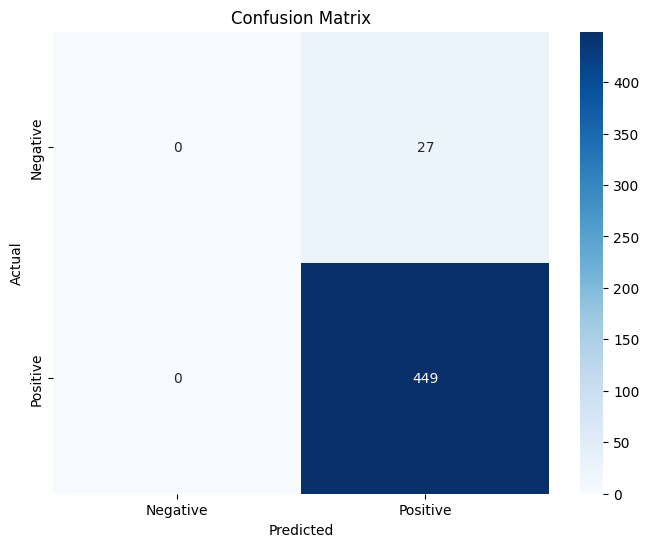

In [95]:
# 혼동 행렬 생성 및 시각화
conf_matrix = confusion_matrix(y_test, y_pred_label)  # 혼동 행렬 생성
plt.figure(figsize=(8, 6))  # 그래프 크기 설정
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])  # 혼동 행렬 시각화
plt.xlabel('Predicted')  # x축 라벨 설정
plt.ylabel('Actual')  # y축 라벨 설정
plt.title('Confusion Matrix')  # 그래프 제목 설정
plt.show()  # 그래프 출력

여전히 긍정예측으로 쏠려있습니다.
아무래도 긍정리뷰의 수가 압도적으로 많다보니 생기는 현상으로 보입니다.

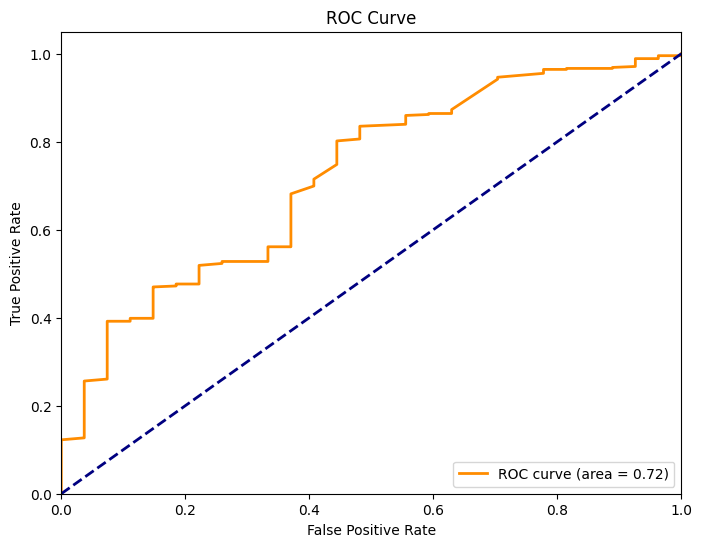

In [96]:
# ROC 커브 그리기
fpr, tpr, _ = roc_curve(y_test, y_pred)  # FPR, TPR 계산
roc_auc = auc(fpr, tpr)  # AUC 계산

plt.figure(figsize=(8, 6))  # 그래프 크기 설정
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)  # ROC 커브 그리기
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # 대각선 기준선 그리기
plt.xlim([0.0, 1.0])  # x축 범위 설정
plt.ylim([0.0, 1.05])  # y축 범위 설정
plt.xlabel('False Positive Rate')  # x축 라벨 설정
plt.ylabel('True Positive Rate')  # y축 라벨 설정
plt.title('ROC Curve')  # 그래프 제목 설정
plt.legend(loc='lower right')  # 범례 위치 설정
plt.show()  # 그래프 출력

반면에 auc점수는 눈에 띄게 올랐습니다.
0.59에서 0.72까지 상승했습니다.
빈도 키워드 피처에서 reviews.text의 키워드를 사용한것과 텍스트길이 피처 삭제, 키워드 추가가 분류성능에 유의미한 결과를 준것이라 볼 수 있겠습니다.

데이터 전처리, 감정점수 분석, 모델구현과 평가, 시각화까지 진행되었고
긍정으로 예측이 쏠린것을 언더피팅이라 판단하고 해결하려 하였으나 자료자체가 긍정리뷰가 압도적으로 많으므로 데이터 불균형이 원인인것으로 결론지었습니다.
